In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv("./datas/seeds_data.txt", names=cols, sep="\s+")
df.head(5)

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### K-Means Clustering (Two Dimensions)

In [3]:
from sklearn.cluster import KMeans

# Compare two random categories
x = "compactness"
y = "asymmetry"

In [15]:
X = df[[x, y]].values

kmeans = KMeans(n_clusters = 3).fit(X)

cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns=[x, y, "class"])
cluster_df.head(5)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,compactness,asymmetry,class
0,0.8710,2.221,2.0
1,0.8811,1.018,2.0
2,0.9050,2.699,2.0
3,0.8955,2.259,2.0
4,0.9034,1.355,2.0


[]

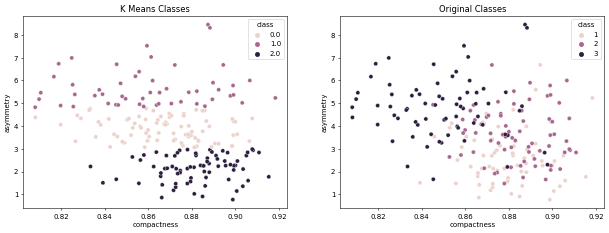

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=50)

# K-Means classes
sns.scatterplot(x=x, y=y, hue="class", data=cluster_df, ax=ax1)
ax1.set_title("K Means Classes")

# Original classes
sns.scatterplot(x=x, y=y, hue="class", data=df, ax=ax2)
ax2.set_title("Original Classes")

plt.plot()

### K-Means Clustering (Higher Dimension)

In [6]:
X = df[cols[:-1]].values

kmeans = KMeans(n_clusters = 3).fit(X)

cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns=df.columns)
cluster_df.head(5)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2.0


[]

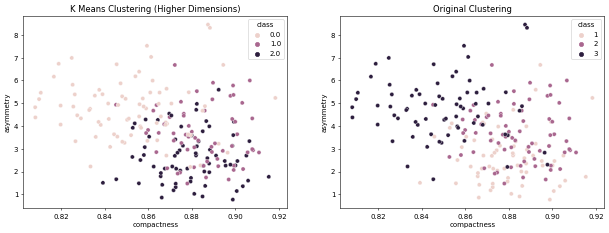

In [7]:
# x = "compactness"
# y = "asymmetry"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=50)

# K-Means classes
sns.scatterplot(x=x, y=y, hue="class", data=cluster_df, ax=ax1)
ax1.set_title("K Means Clustering (Higher Dimensions)")

# Original classes
sns.scatterplot(x=x, y=y, hue="class", data=df, ax=ax2)
ax2.set_title("Original Clustering")

plt.plot()

### Principal Component Analysis Clustering (PCA)

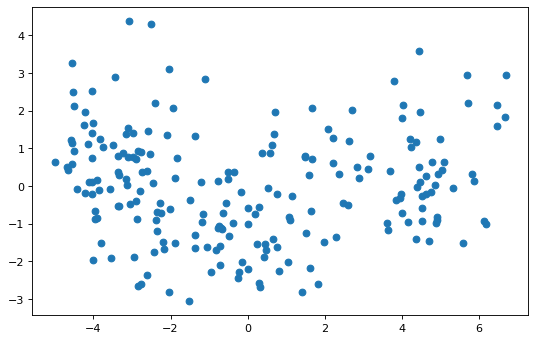

In [8]:
from sklearn.decomposition import PCA

X = df[cols[:-1]].values

pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

plt.figure(figsize = (8,5), dpi = 80)
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [9]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["PCA_1", "PCA_2", "class"])
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1, 1))), columns=["PCA_1", "PCA_2", "class"])

[]

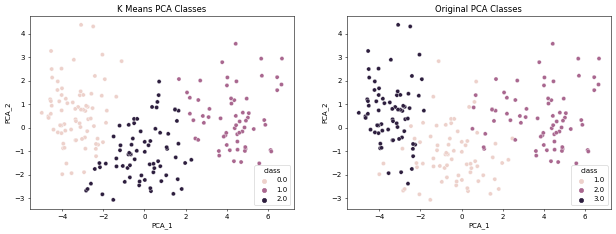

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=50)

# K-Means classes
sns.scatterplot(x="PCA_1", y="PCA_2", hue="class", data=kmeans_pca_df, ax=ax1)
ax1.set_title("K Means PCA Classes")

# Original classes
sns.scatterplot(x="PCA_1", y="PCA_2", hue="class", data=truth_pca_df, ax=ax2)
ax2.set_title("Original PCA Classes")

plt.plot()